# Environment Setup


In [1]:
import os
try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("We're running Colab")
if IN_COLAB:
  # Mount the Google Drive at mount
  mount='/content/gdrive'
  
  print("Colab: mounting Google drive on ", mount)
  drive.mount(mount, force_remount=True)
  

  # Switch to the directory on the Google Drive that you want to use

  drive_root = mount + "/MyDrive/Adult/2023/SourceFuse/"

  # Change to the directory
  print("\nColab: Changing directory to ", drive_root)
  %cd $drive_root

We're running Colab
Colab: mounting Google drive on  /content/gdrive
Mounted at /content/gdrive

Colab: Changing directory to  /content/gdrive/MyDrive/Adult/2023/SourceFuse/
/content/gdrive/MyDrive/Adult/2023/SourceFuse


In [20]:
# Importing dataset from scikit-learn and other useful packages:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# We will fix a random seed for reproducibility:
SEED = 11
np.random.seed(SEED)

# Explore the Data Set

In [3]:
iris_ds = load_iris()

In [21]:
print("Featues for each flower")
print(iris_ds['feature_names'])
print("Targets/labels of each flower")
print(iris_ds['target_names'])
print("\nRandom example Data")
range_ints = np.arange(len(iris_ds['data']))
np.random.shuffle(range_ints)
for i in range_ints[:3]:
  print('features:',iris_ds['data'][i])
  print('target: ', iris_ds['target'][i])


Featues for each flower
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets/labels of each flower
['setosa' 'versicolor' 'virginica']

Random example Data
features: [6.8 3.  5.5 2.1]
target:  2
features: [6.7 3.  5.2 2.3]
target:  2
features: [6.3 2.8 5.1 1.5]
target:  2


In [22]:
print(iris_ds['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [25]:
data_for_df = np.concatenate((np.array(iris_ds['data']),np.expand_dims(np.array(iris_ds['target'], dtype=int), axis=1)), axis=1)
columns = iris_ds['feature_names'].copy()
columns.append('target')
iris_df = pd.DataFrame(data_for_df, columns =columns  )
iris_df=iris_df.sample(frac=1).reset_index(drop=True)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,4.8,3.4,1.9,0.2,0.0
1,5.7,4.4,1.5,0.4,0.0
2,5.7,3.0,4.2,1.2,1.0
3,5.1,3.8,1.6,0.2,0.0
4,4.9,3.0,1.4,0.2,0.0


In [26]:
type(iris_ds)

sklearn.utils.Bunch

In [27]:
iris_df['target_name'] = iris_df['target'].apply(lambda x: iris_ds['target_names'][int(x)])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,4.8,3.4,1.9,0.2,0.0,setosa
1,5.7,4.4,1.5,0.4,0.0,setosa
2,5.7,3.0,4.2,1.2,1.0,versicolor
3,5.1,3.8,1.6,0.2,0.0,setosa
4,4.9,3.0,1.4,0.2,0.0,setosa


The below plot confirms the correlation values presented in the DESC field of the data set. It shows us that based on petal length and width alone, there is a relatively linearly seperable relationship between the classes. 

In [28]:
def plot_classes(iris_df, xlabel, ylabel):
  for classid in iris_df['target'].unique():
    xys = iris_df[iris_df['target']==classid]
    x = xys[xlabel].to_numpy()
    y = xys[ylabel].to_numpy()
    plt.scatter(x,y,label=iris_ds['target_names'][int(classid)] )
    plt.legend()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)  

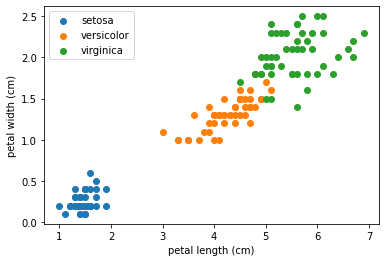

In [29]:
ylabel= 'petal width (cm)'
xlabel = 'petal length (cm)'
plot_classes(iris_df, xlabel, ylabel)

the sepal width and length alone aren't good at seperating the versicolor and virginica. These two classes are also the most mixed with the petal width and length. They likely will result in the most errors in prediction. 

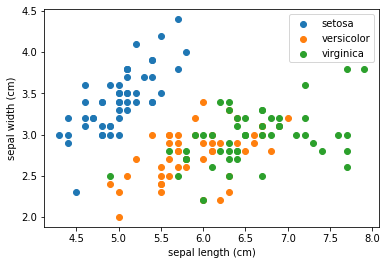

In [30]:
ylabel= 'sepal width (cm)'
xlabel = 'sepal length (cm)'
plot_classes(iris_df, xlabel, ylabel)

# Predictive Models
KNN, Random Forest Classifier, SVM classifier, and a logistic regression classifier

In [31]:
from sklearn.model_selection import train_test_split

 I prefer to split into three categories. A technique that tries to avoid the bias introduced by choosing the right hyperparameters (like model architecture or parameters) based on the accuracy of the test set.

In [32]:
test_split = 0.4
x_data = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']].to_numpy()
y_data = [int(x) for x in iris_df.target.to_list()]
X_train, X_t, y_train, y_t = train_test_split(x_data, y_data, test_size=test_split, random_state=SEED)
X_test, X_dev, y_test, y_dev = train_test_split(X_t, y_t, test_size=0.5, random_state=SEED)

In [33]:
type(X_test)

numpy.ndarray

## KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn_scores = []
for k in [1,3,5,7,8,40]:
  for w in ['uniform', 'distance']:
    neigh = KNeighborsClassifier(n_neighbors=k, weights=w)
    neigh.fit(X_train, y_train)
    score =neigh.score(X_dev, y_dev)
    knn_scores.append({"n_neighbors":k, "weights":w, "score":score, "ct_train":len(X_train), "ct_dev":len(X_dev)})
knn_scores_df = pd.DataFrame(knn_scores)
knn_scores_df.sort_values(by='score', ascending=False, ignore_index=True, inplace=True)

In [36]:
knn_scores_df

,n_neighbors,weights,score,ct_train,ct_dev
0,8,distance,1.000000,90,30
1,1,uniform,0.966667,90,30
2,1,distance,0.966667,90,30
3,3,uniform,0.966667,90,30
4,3,distance,0.966667,90,30
5,5,uniform,0.966667,90,30
6,5,distance,0.966667,90,30
7,7,uniform,0.966667,90,30
8,7,distance,0.966667,90,30
9,8,uniform,0.966667,90,30


I like the idea of the 'distance' weight in the classifier logically based on the graphs I made in data exploration. Valuing too many points too far out equally is not logical, and it does fail on the extreme when we go to 40 data points. I'll stick with k=8 and weights=distance

In [37]:
neigh = KNeighborsClassifier(n_neighbors=8, weights='distance')
neigh.fit(X_train, y_train)
score_train =neigh.score(X_train, y_train)
score_dev =neigh.score(X_dev, y_dev)
score_test =neigh.score(X_test, y_test)
print("train score", score_train)
print("dev score", score_dev)
print("test score", score_test)

train score 1.0
dev score 1.0
test score 0.9


## Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc_data = []
for n_estimators in [4, 50,100]:
  for criterion in ['gini', 'entropy']:
    for max_depth in [2,4,10]:
      for min_samples_split in [2,4,10]:
        for min_samples_leaf in [1,2,4,8]:
          params = {"n_estimators":n_estimators, "criterion":criterion, "max_depth":max_depth, "min_samples_leaf":min_samples_leaf, "min_samples_split":min_samples_split}
          clf = RandomForestClassifier(**params, random_state=SEED)
          clf.fit(X_train, y_train)
          score=clf.score(X_dev, y_dev)
          params.update({"score":score, "ct_train":len(X_train), "ct_dev":len(X_dev)})
          rfc_data.append(params)
rfc_df= pd.DataFrame(rfc_data)
rfc_df.sort_values(by='score', ascending=False, ignore_index=True, inplace=True)


In [43]:
rfc_df

,n_estimators,criterion,max_depth,min_samples_leaf,min_samples_split,score,ct_train,ct_dev
0,50,gini,4,2,4,1.000000,90,30
1,100,gini,4,1,10,1.000000,90,30
2,100,gini,10,2,10,1.000000,90,30
3,100,gini,4,2,4,1.000000,90,30
4,4,entropy,4,2,4,1.000000,90,30
...,...,...,...,...,...,...,...,...
211,4,entropy,2,8,10,0.933333,90,30
212,4,entropy,2,4,10,0.933333,90,30
213,4,entropy,2,2,10,0.933333,90,30
214,4,entropy,2,1,10,0.933333,90,30


In [44]:
rfc_df[:20]

,n_estimators,criterion,max_depth,min_samples_leaf,min_samples_split,score,ct_train,ct_dev
0,50,gini,4,2,4,1.0,90,30
1,100,gini,4,1,10,1.0,90,30
2,100,gini,10,2,10,1.0,90,30
3,100,gini,4,2,4,1.0,90,30
4,4,entropy,4,2,4,1.0,90,30
5,4,entropy,4,1,4,1.0,90,30
6,50,gini,10,1,10,1.0,90,30
7,50,entropy,10,1,2,1.0,90,30
8,4,entropy,4,2,2,1.0,90,30
9,4,entropy,4,1,2,1.0,90,30


A lot of the params are tied for first. So I'll take some of the smaller numbers to keep the model simpler.

In [45]:
clf = RandomForestClassifier(n_estimators=50,criterion='entropy', max_depth=4, min_samples_leaf=1, min_samples_split=2, random_state=SEED)
clf.fit(X_train, y_train)
score_train=clf.score(X_train, y_train)
score_dev=clf.score(X_dev, y_dev)
score_test=clf.score(X_test, y_test)
print("train score", score_train)
print("dev score", score_dev)
print("test score", score_test)

train score 1.0
dev score 1.0
test score 0.9333333333333333


## SVM

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [48]:
svm_data = []
for kernel in ['rbf', 'poly','sigmoid','linear']:
  if kernel in ('rbf', 'poly','sigmoid'):
    for gamma in ['scale', 'auto']:
      clf = make_pipeline(StandardScaler(), SVC(kernel=kernel,gamma=gamma, random_state=SEED))
      clf.fit(X_train, y_train)
      score=clf.score(X_dev, y_dev)      
      svm_data.append({"kernel":kernel, "gamma":gamma,"score":score, "ct_train":len(X_train), "ct_dev":len(X_dev) })
  else:
      clf = make_pipeline(StandardScaler(), SVC(kernel=kernel,random_state=SEED))
      clf.fit(X_train, y_train)
      score=clf.score(X_dev, y_dev)      
      svm_data.append({"kernel":kernel, "gamma":gamma,"score":score, "ct_train":len(X_train), "ct_dev":len(X_dev) })
svm_df= pd.DataFrame(svm_data)
svm_df.sort_values(by='score', ascending=False, ignore_index=True, inplace=True)
svm_df

,kernel,gamma,score,ct_train,ct_dev
0,linear,auto,1.000000,90,30
1,rbf,scale,0.966667,90,30
2,rbf,auto,0.966667,90,30
3,sigmoid,scale,0.866667,90,30
4,sigmoid,auto,0.866667,90,30
5,poly,scale,0.833333,90,30
6,poly,auto,0.833333,90,30


In [49]:
clf = make_pipeline(StandardScaler(), SVC(kernel='linear', gamma='auto'))
clf.fit(X_train, y_train)
score_dev=clf.score(X_dev, y_dev)
score_test=clf.score(X_test, y_test)
print("train score", score_train)
print("dev score", score_dev)
print("test score", score_test)

train score 1.0
dev score 1.0
test score 0.9333333333333333


## Logistic Regression

this architecture is pretty simple so I'm just going to skip the processing of grid searching through hyperparameters

In [50]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=SEED)
clf.fit(X_train, y_train)
score_dev=clf.score(X_dev, y_dev)
score_test=clf.score(X_test, y_test)
print("train score", score_train)
print("dev score", score_dev)
print("test score", score_test)

train score 1.0
dev score 1.0
test score 0.9333333333333333


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
